In [93]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [94]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [95]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [96]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [97]:
# reflect an existing database into a new model
 # Reflect Database into ORM classes
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [98]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [99]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [100]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [101]:
# Find the most recent date in the data set.
data = engine.execute("SELECT * FROM measurement ORDER BY date DESC LIMIT 1")
for record in data:
    print(record)

(2724, 'USC00519397', '2017-08-23', 0.0, 81.0)


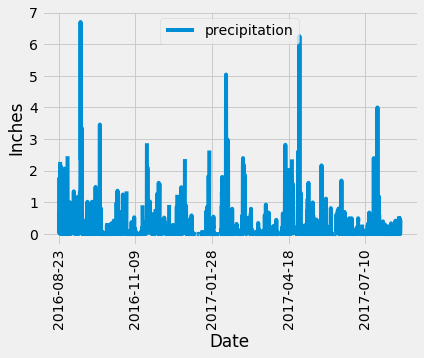

In [102]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
recent_date = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
last_year = recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation score
results = session.query(measurement.prcp, measurement.date).filter(measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['precipitation', 'date'])

# Sort the dataframe by date
df = df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x="date", y="precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation='vertical')
plt.figsize=(10, 6)

In [103]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [110]:
# Design a query to calculate the total number of stations in the dataset
number_results = session.query(station.station).count()
print(number_results)


9


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_results = engine.execute("SELECT station, count(station) FROM measurement GROUP BY station ORDER BY count(station) DESC LIMIT 10")
for record in active_results:
    print(record)

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [150]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_results2 = engine.execute("SELECT min(tobs), max(tobs), avg(tobs) FROM measurement WHERE station IS 'USC00519281' GROUP BY station LIMIT 10")
for record in active_results2:
    print(record)

(54.0, 85.0, 71.66378066378067)


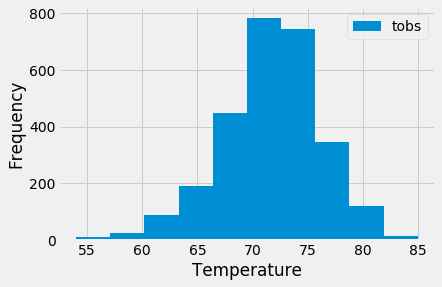

In [158]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_results3 = engine.execute("SELECT tobs, prcp FROM measurement WHERE station IS 'USC00519281'")
for record in active_results2:
    print(record)

df2 = pd.DataFrame(active_results3, columns=['tobs', 'prcp'])
# df2 = df2.sort_values("date")

df2.plot.hist(x="prcp", y="tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.figsize=(10, 6)


# Close Session

In [ ]:
# Close Session
session.close()